In [1]:
import numpy as np
import h5py

f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
              +",FALSE,1/deeplift.imp_score.h5", "r")
#f = h5py.File("/users/avanti/deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [11]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
                +"/Nanog/out/profile/wn/modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

In [15]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

pattern idx 0
4011


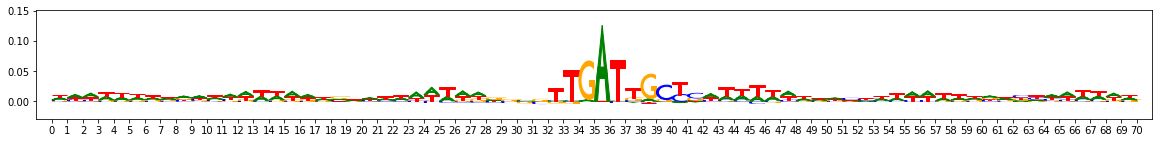

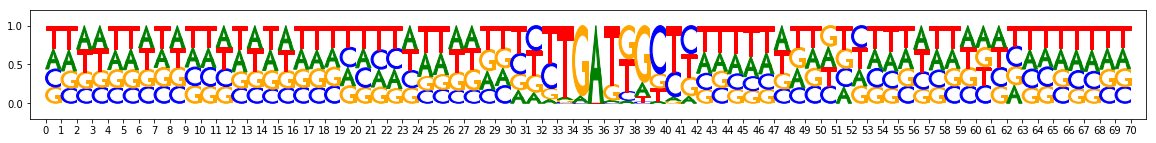

pattern idx 1
2215


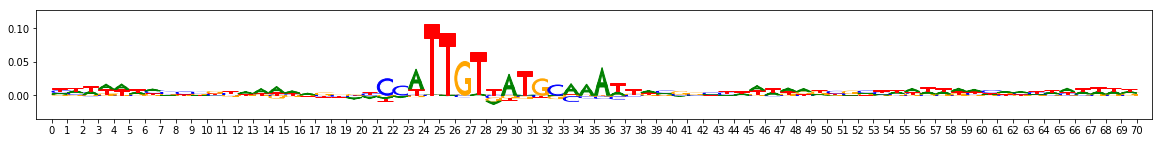

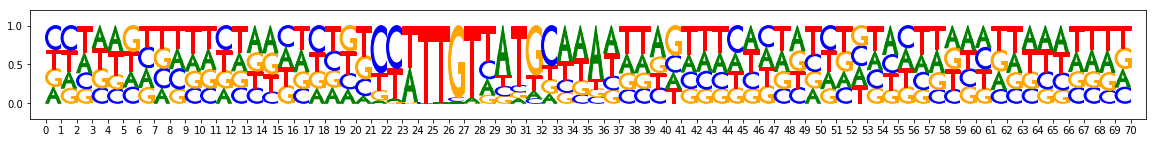

pattern idx 2
1854


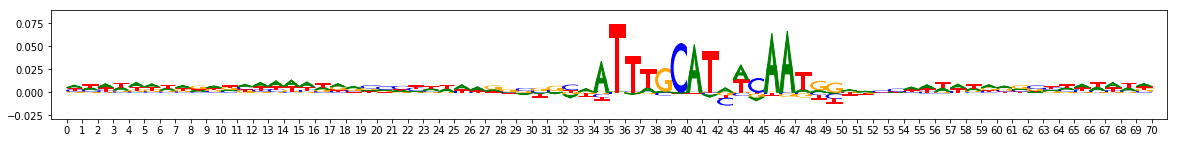

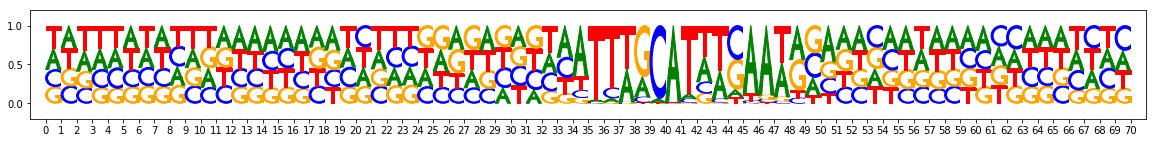

pattern idx 3
1636


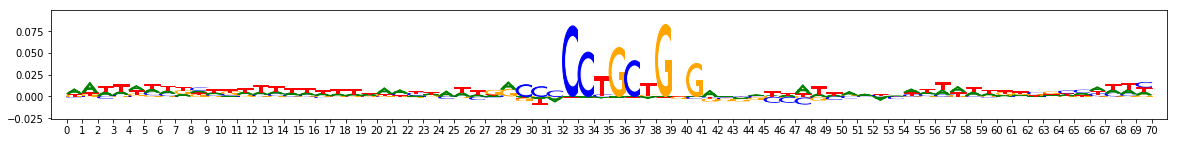

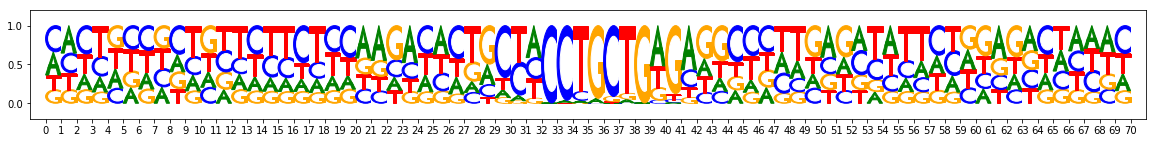

pattern idx 4
937


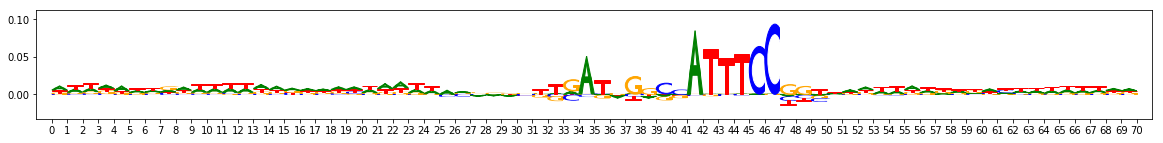

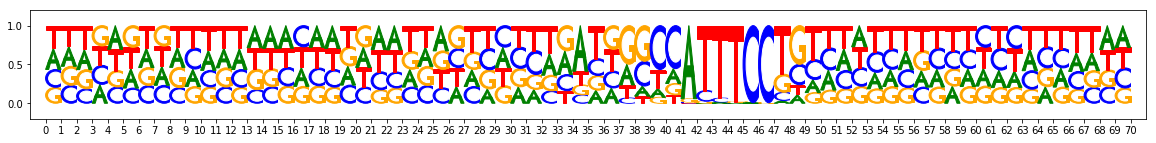

pattern idx 5
749


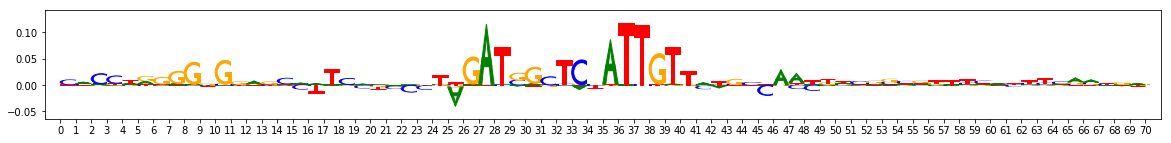

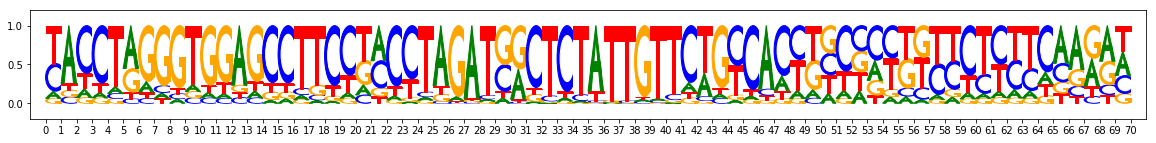

pattern idx 6
466


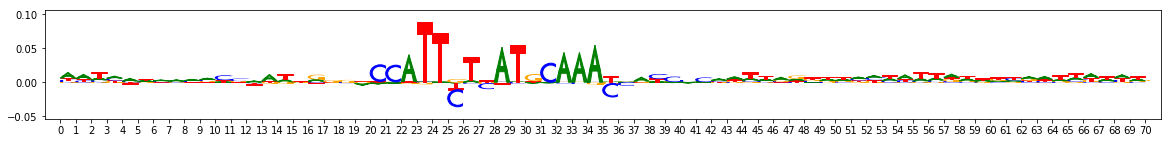

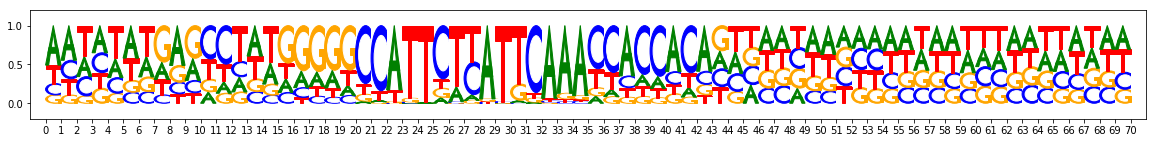

pattern idx 7
231


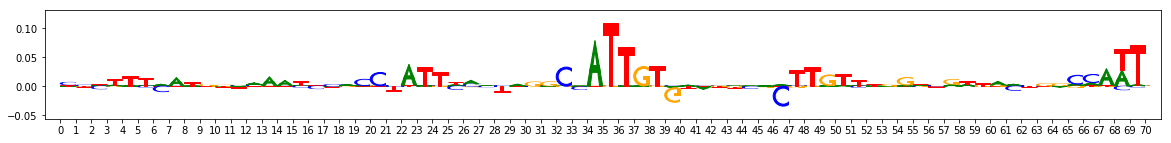

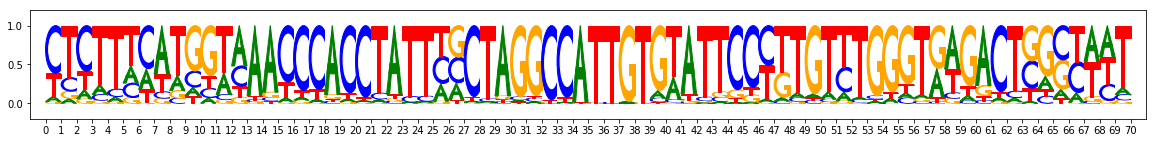

pattern idx 8
191


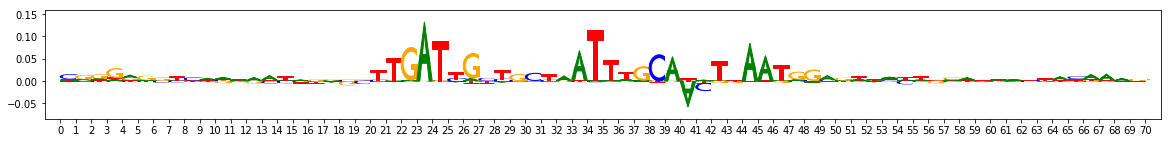

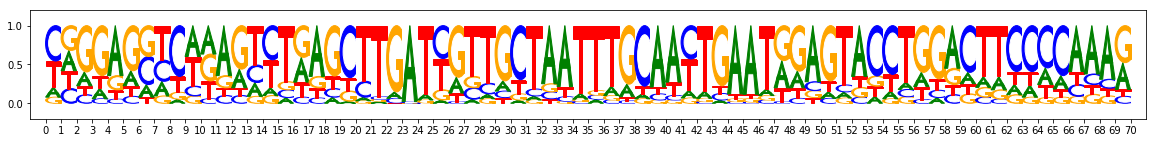

pattern idx 9
187


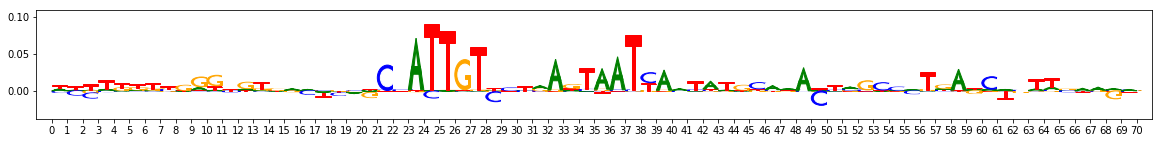

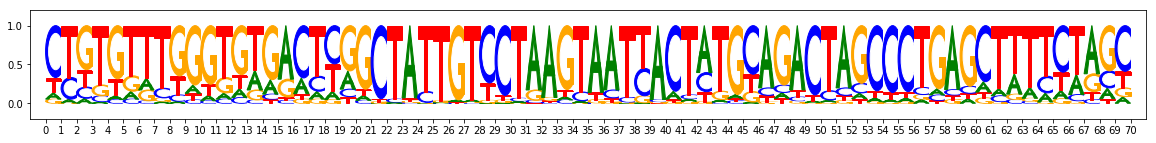

pattern idx 10
142


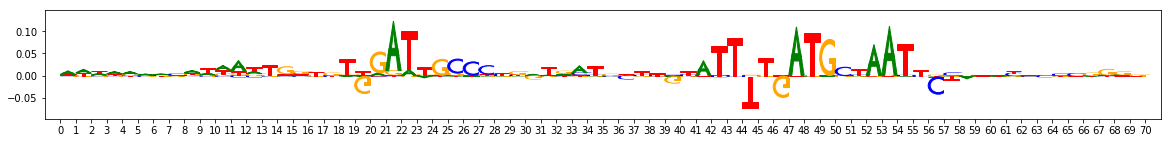

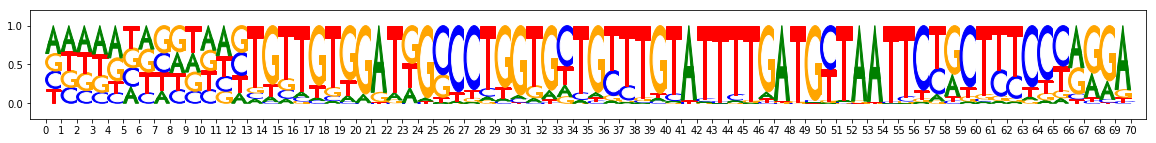

pattern idx 11
117


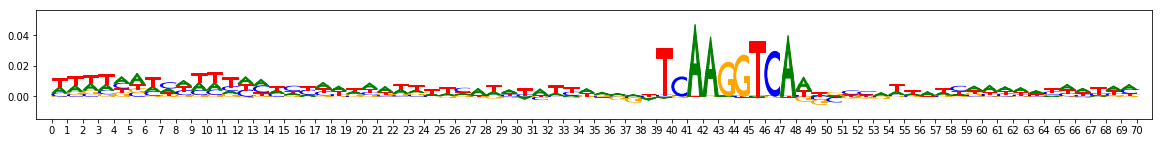

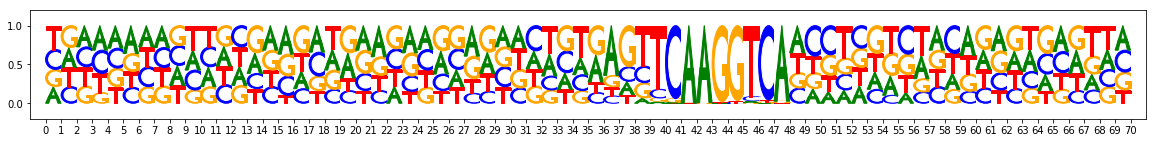

pattern idx 12
89


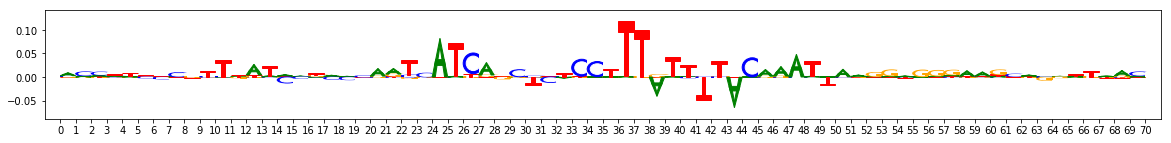

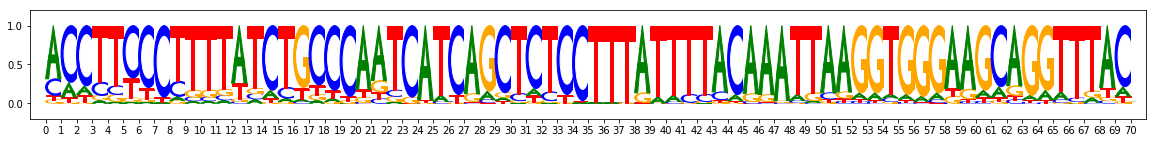

pattern idx 13
105


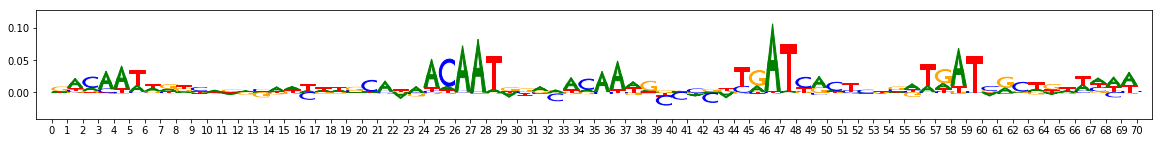

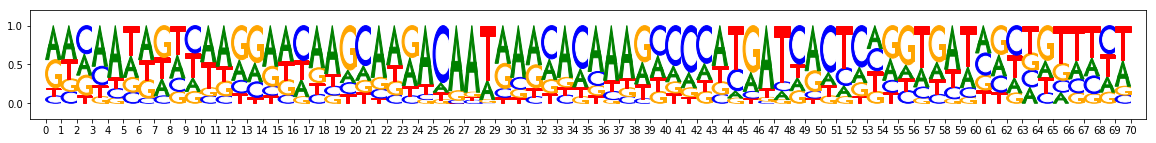

pattern idx 14
105


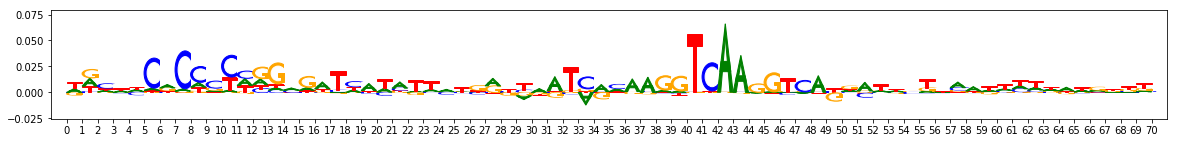

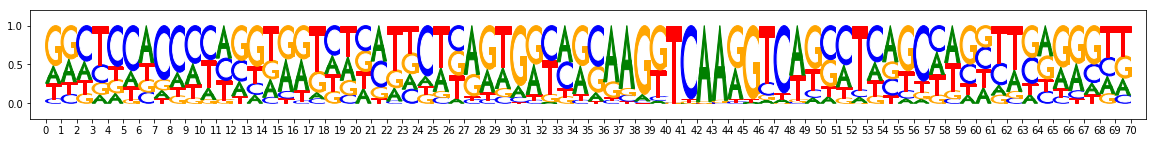

pattern idx 15
65


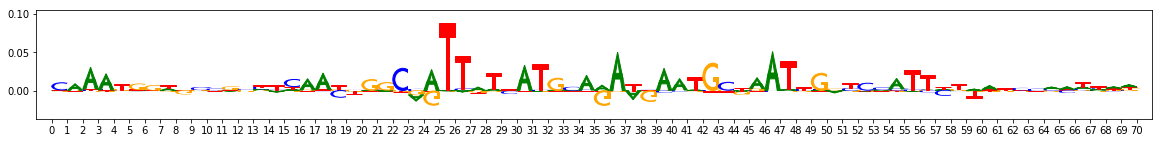

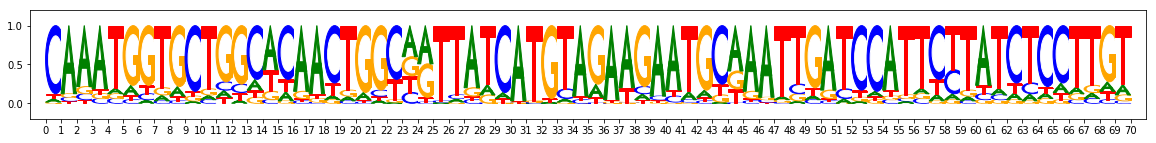

In [3]:
#visualize the patterns:
%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)

TF-MoDISco is using the TensorFlow backend.


MEMORY 2.997723136
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.00754788601747714
Computing threshold
Thresholds from null dist were -0.026598811149597168  and  0.2509317398071289
Passing windows frac was 0.04676685078463518 , which is above  0.03 ; adjusting
Final raw thresholds are -0.3184376752376554  and  0.3184376752376554
Final transformed thresholds are -0.9699999852203116  and  0.9699999852203116


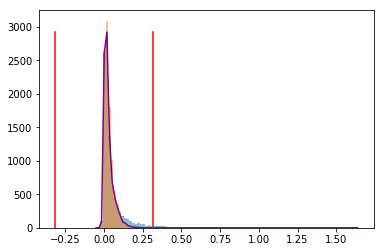

Got 98300 coords
After resolving overlaps, got 98300 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9699998852203117
MEMORY 4.835848192
98300 identified in total
1 activity patterns with support >= 2000 out of 3 possible patterns
Metacluster sizes:  [98297]
Idx to activities:  {0: '1'}
MEMORY 4.836581376
On metacluster 0
Metacluster size 98297 limited to 50000
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)


W1223 21:48:12.159945 139840702404352 deprecation_wrapper.py:119] From /users/avanti/modisco_private/modisco/backend/tensorflow_backend.py:87: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 50000
(Round 1) Computing coarse affmat
MEMORY 4.837838848
Beginning embedding computation
Computing embeddings


Using TensorFlow backend.
W1223 21:48:16.465768 139840702404352 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1223 21:48:16.467366 139840702404352 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:184: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1223 21:48:16.468326 139840702404352 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1223 21:48:16.771136 139840702404352 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use 

Finished embedding computation in 15.84 s
Starting affinity matrix computations
Normalization computed in 4.02 s
Cosine similarity mat computed in 289.02 s
Normalization computed in 4.17 s
Cosine similarity mat computed in 299.36 s
Finished affinity matrix computations in 661.46 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 17.248313344
Computed nearest neighbors in 60.06 s
MEMORY 27.448717312
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 27.448717312
Launching nearest neighbors affmat calculation job
MEMORY 27.553284096
Parallel runs completed
MEMORY 28.003729408
Job completed in: 349.42 s
MEMORY 47.749988352
Launching nearest neighbors affmat calculation job
MEMORY 47.7119488
Parallel runs completed
MEMORY 47.836094464
Job completed in: 337.82 s
MEMORY 67.582353408
(Round 1) Computed affinity matrix on nearest neighbors in 721.04 s
MEMORY 47.948054528
Filtered down to 21445 of 50000
(Round 1) Retained 21445 rows out of 50000 after filtering
MEMORY 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   22.0s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:   23.4s finished


Louvain completed 200 runs in 308.31568813323975 seconds
Wrote graph to binary file in 104.69122815132141 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.786847
After 3 runs, maximum modularity is Q = 0.786849
After 4 runs, maximum modularity is Q = 0.788253
After 5 runs, maximum modularity is Q = 0.790053
After 23 runs, maximum modularity is Q = 0.790901
After 41 runs, maximum modularity is Q = 0.791077
After 46 runs, maximum modularity is Q = 0.792669
Louvain completed 96 runs in 530.4235770702362 seconds
Preproc + Louvain took 973.8265120983124 s
Got 25 clusters after round 1
Counts:
{5: 1721, 7: 1333, 10: 691, 2: 1947, 3: 1901, 6: 1374, 11: 679, 9: 700, 17: 155, 1: 2310, 0: 3551, 4: 1857, 18: 125, 15: 363, 16: 362, 8: 729, 20: 90, 14: 364, 13: 407, 22: 74, 19: 95, 12: 431, 21: 82, 23: 58, 24: 46}
MEMORY 17.948725248
(Round 1) Aggregating seqlets in each cluster
MEMORY 17.948725248
Aggregating for cluster 0 with 3551 seqlets
MEMORY 17.948725

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    9.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   17.6s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:   18.7s finished


Louvain completed 200 runs in 242.08450078964233 seconds
Wrote graph to binary file in 106.68303894996643 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.749226
After 2 runs, maximum modularity is Q = 0.749437
After 8 runs, maximum modularity is Q = 0.751736
After 10 runs, maximum modularity is Q = 0.761559
After 13 runs, maximum modularity is Q = 0.763779
Louvain completed 63 runs in 330.63257002830505 seconds
Preproc + Louvain took 704.8161363601685 s
Got 26 clusters after round 2
Counts:
{7: 819, 5: 1364, 2: 2211, 1: 2767, 0: 4186, 9: 493, 3: 1793, 8: 667, 17: 133, 4: 1672, 19: 131, 18: 131, 23: 66, 13: 247, 6: 1211, 10: 352, 22: 93, 14: 209, 16: 133, 11: 319, 21: 95, 12: 316, 15: 169, 25: 27, 24: 30, 20: 110}
MEMORY 9.404952576
(Round 2) Aggregating seqlets in each cluster
MEMORY 9.404952576
Aggregating for cluster 0 with 4186 seqlets
MEMORY 9.404428288
Trimmed 109 out of 4186
Skipped 3 seqlets
Aggregating for cluster 1 with 2767 seqlets
ME

Inspecting for spurious merging
Wrote graph to binary file in 0.020353078842163086 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0146353
After 4 runs, maximum modularity is Q = 0.0146354
Louvain completed 24 runs in 8.686405897140503 seconds
Similarity is -0.008068908; is_dissimilar is True
Got 4 subclusters
Inspecting for spurious merging
Wrote graph to binary file in 0.1799168586730957 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0289985
After 2 runs, maximum modularity is Q = 0.0305488
Louvain completed 22 runs in 7.951857805252075 seconds
Similarity is 0.18979838; is_dissimilar is True
Inspecting for spurious merging
Wrote graph to binary file in 0.09988284111022949 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0250007
After 2 runs, maximum modularity is Q = 0.0326634
Louvain completed 22 runs in 7.911444187164307 seconds
Similarity is 0.49957192; is_

In [2]:
from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

%matplotlib inline

workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,
    flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        trim_to_window_size=30,
        initial_flank_to_add=10,
        kmer_len=6,
        num_gaps=2,
        num_mismatches=0,
        n_cores=10,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

In [3]:
import h5py
import modisco.util
reload(modisco.util)
!rm nonsparserun_l6g2m0_results.hdf5
grp = h5py.File("nonsparserun_l6g2m0_results.hdf5")
results.save_hdf5(grp)
grp.close()

rm: cannot remove 'nonsparserun_l6g2m0_results.hdf5': No such file or directory


metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 5276
Task 0 hypothetical scores:


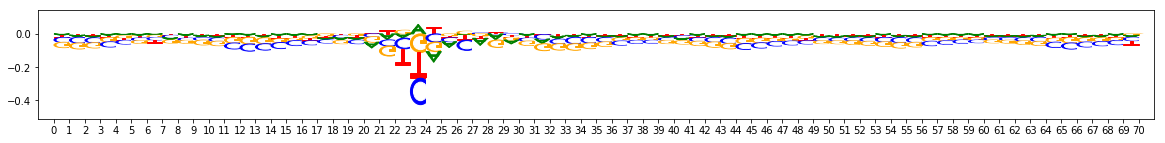

Task 0 actual importance scores:


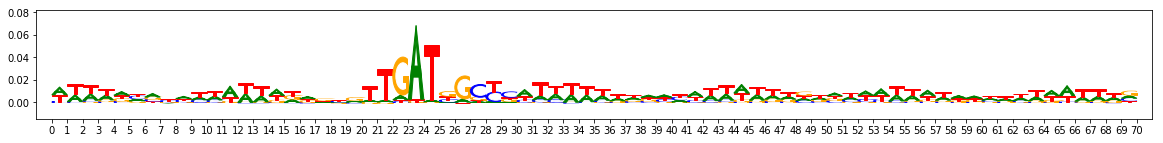

onehot, fwd and rev:


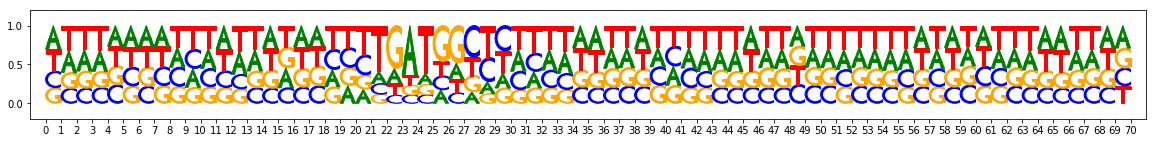

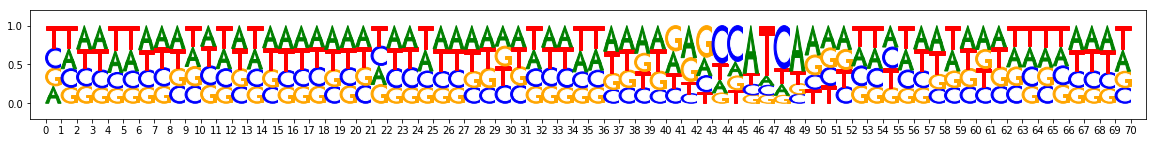

metacluster_0 pattern_1
total seqlets: 4799
Task 0 hypothetical scores:


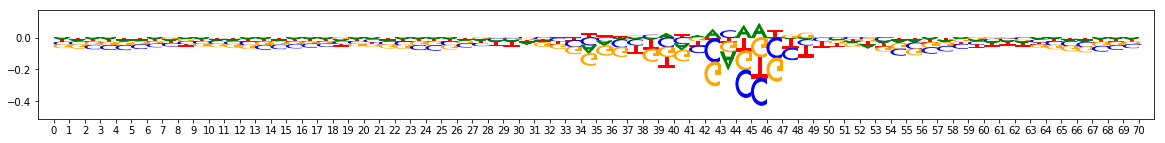

Task 0 actual importance scores:


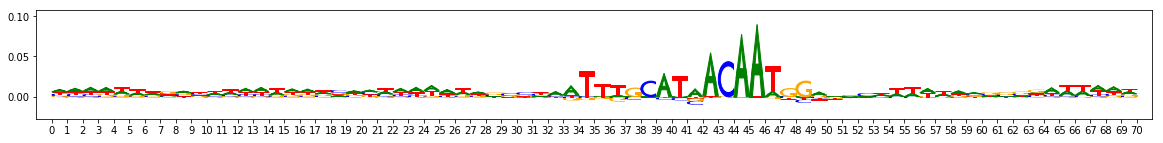

onehot, fwd and rev:


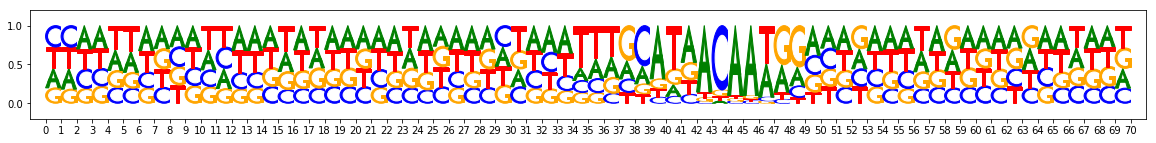

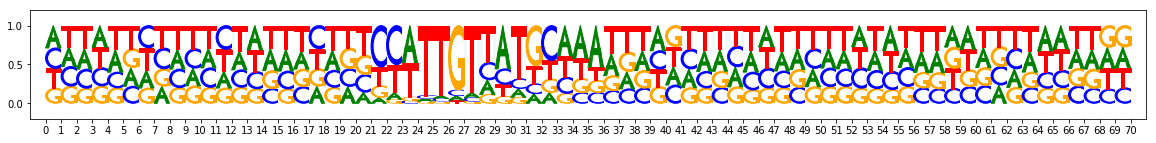

metacluster_0 pattern_2
total seqlets: 2932
Task 0 hypothetical scores:


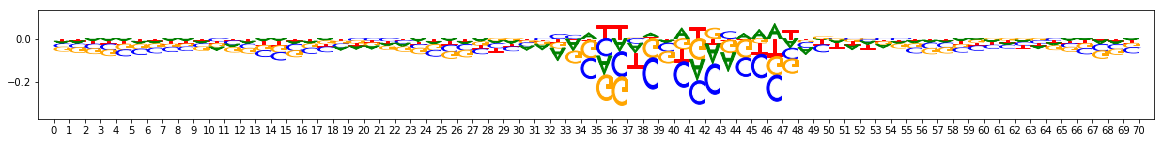

Task 0 actual importance scores:


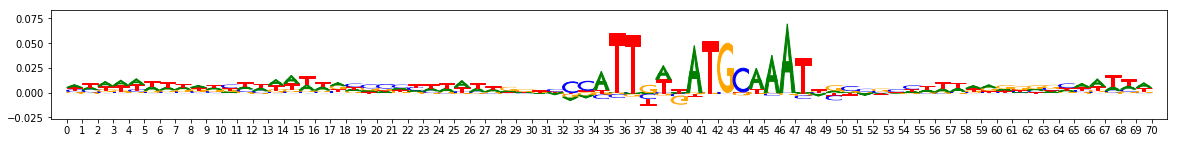

onehot, fwd and rev:


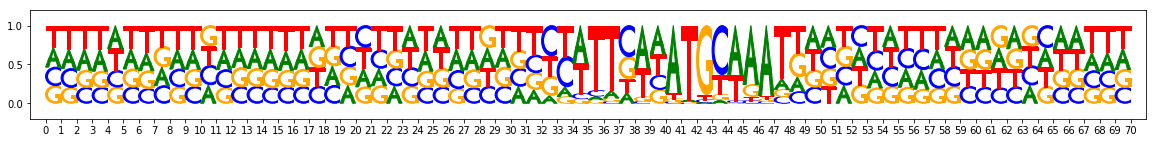

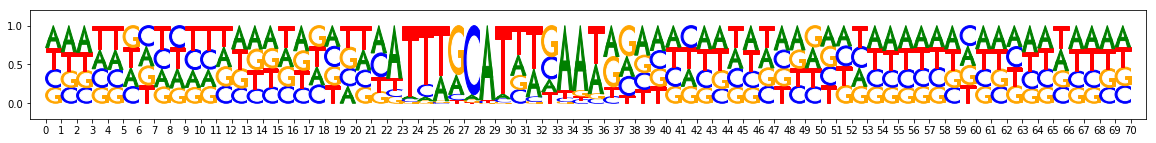

metacluster_0 pattern_3
total seqlets: 1549
Task 0 hypothetical scores:


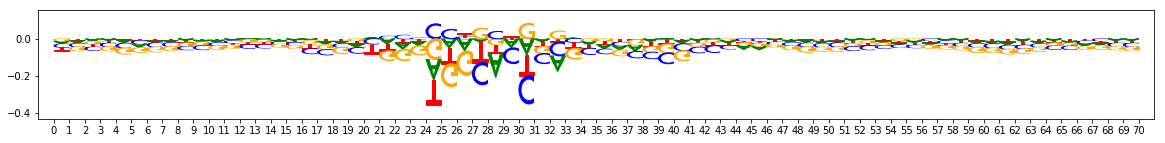

Task 0 actual importance scores:


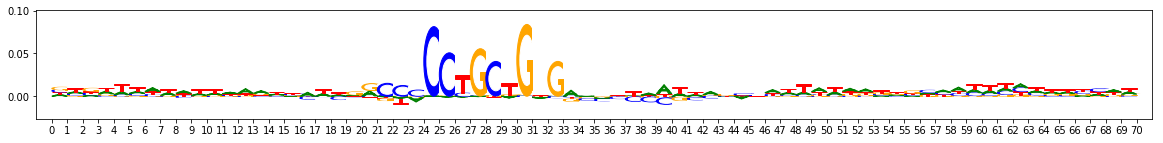

onehot, fwd and rev:


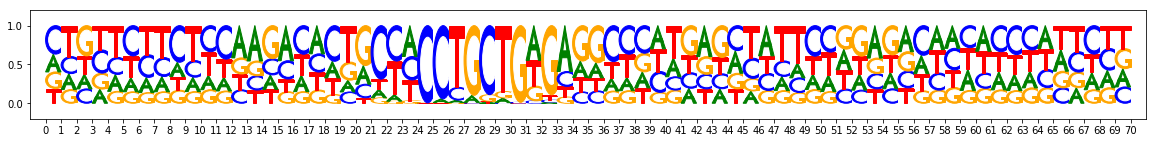

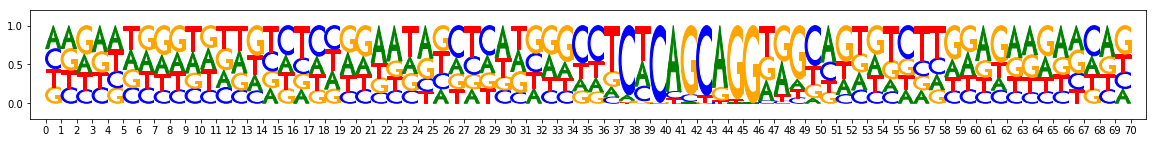

metacluster_0 pattern_4
total seqlets: 1093
Task 0 hypothetical scores:


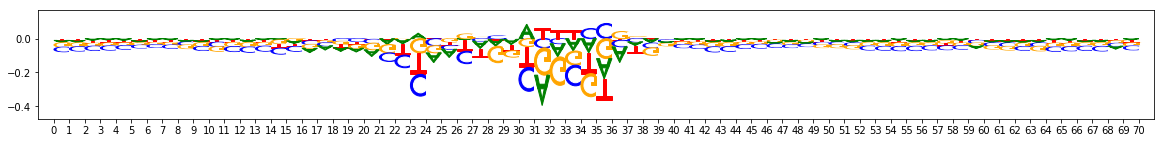

Task 0 actual importance scores:


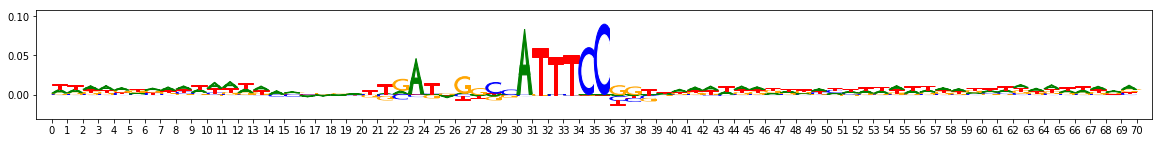

onehot, fwd and rev:


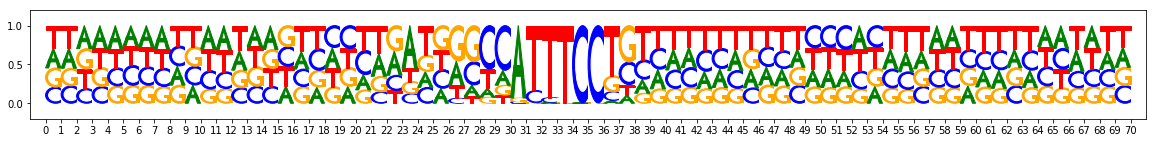

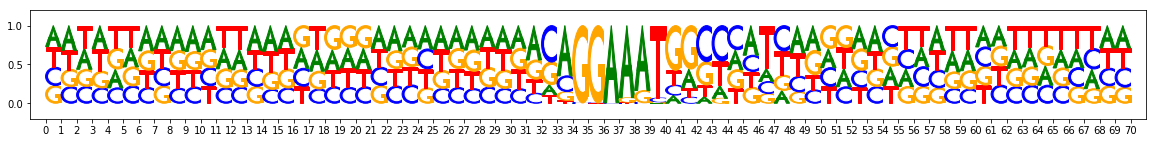

metacluster_0 pattern_5
total seqlets: 513
Task 0 hypothetical scores:


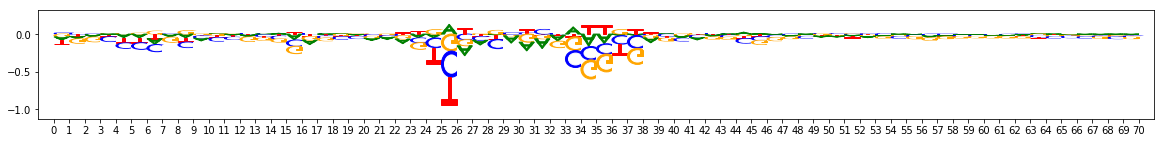

Task 0 actual importance scores:


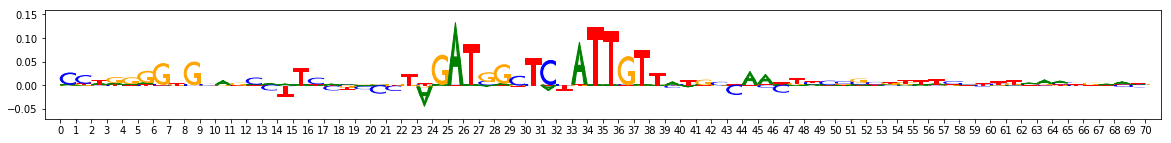

onehot, fwd and rev:


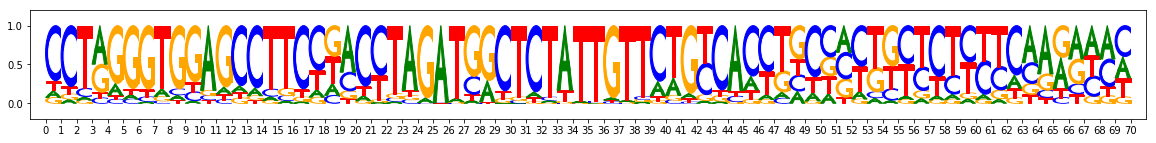

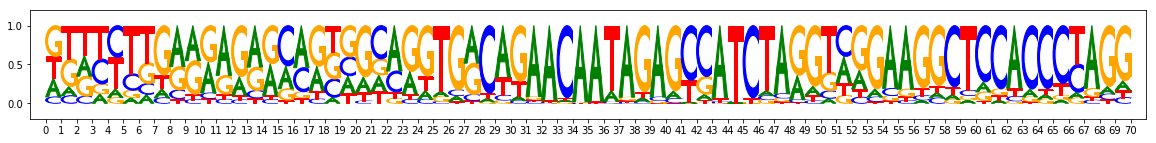

metacluster_0 pattern_6
total seqlets: 264
Task 0 hypothetical scores:


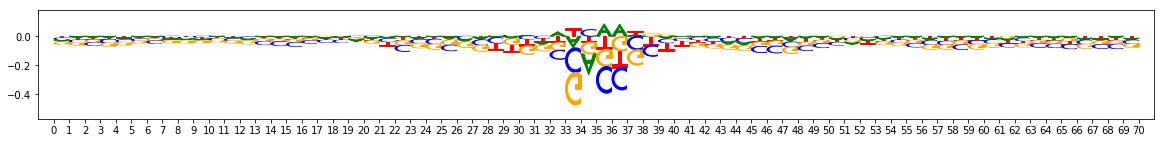

Task 0 actual importance scores:


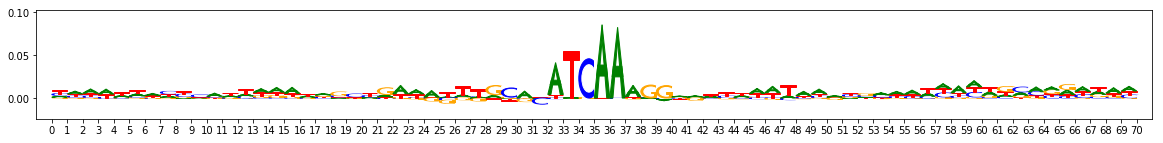

onehot, fwd and rev:


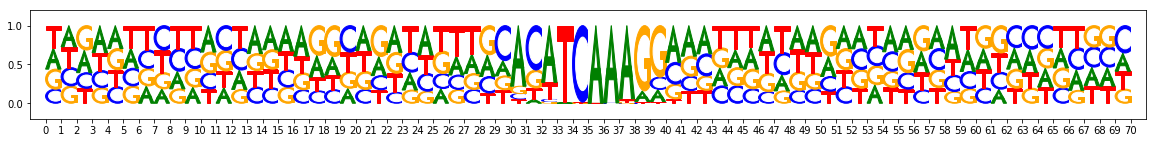

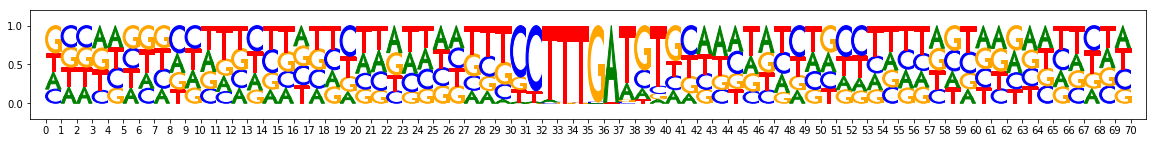

metacluster_0 pattern_7
total seqlets: 208
Task 0 hypothetical scores:


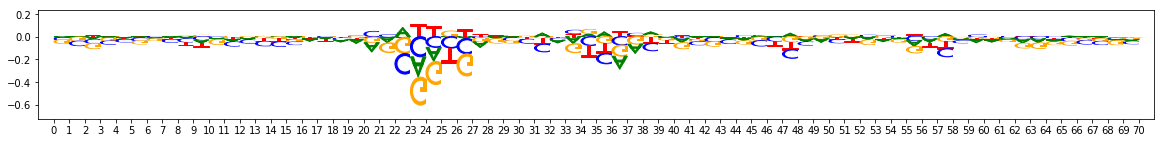

Task 0 actual importance scores:


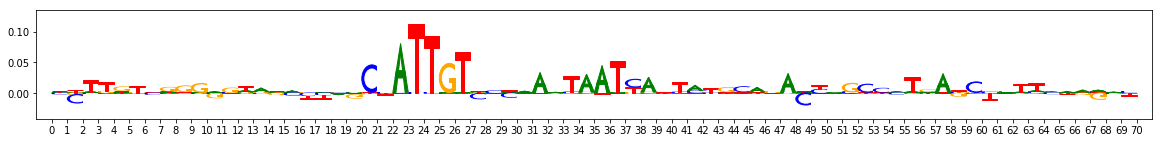

onehot, fwd and rev:


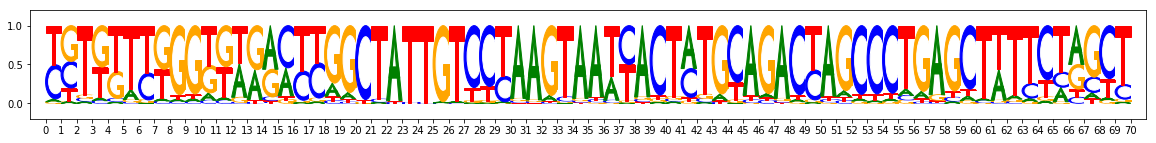

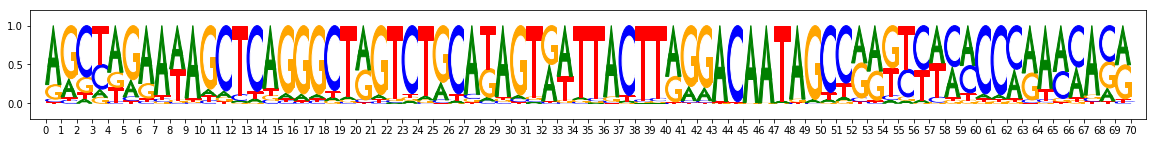

metacluster_0 pattern_8
total seqlets: 203
Task 0 hypothetical scores:


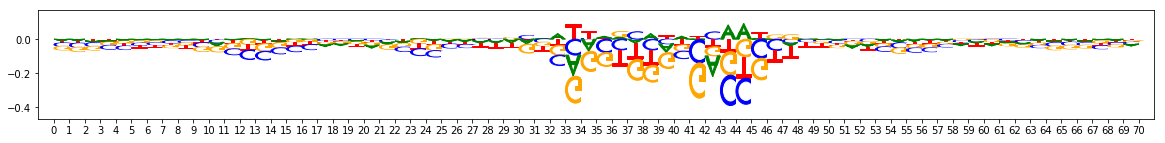

Task 0 actual importance scores:


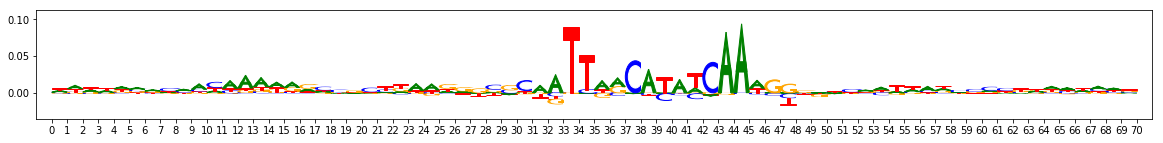

onehot, fwd and rev:


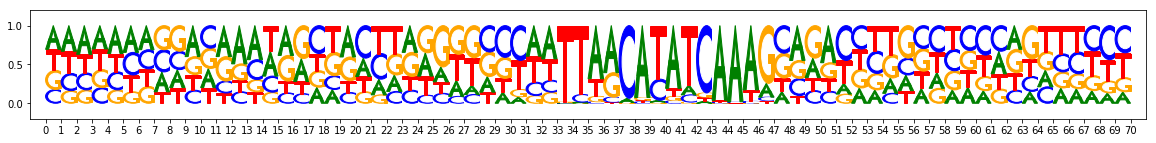

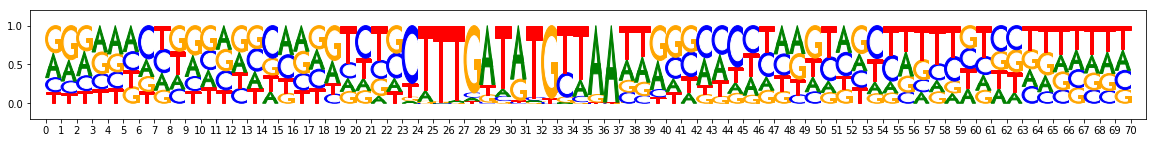

metacluster_0 pattern_9
total seqlets: 193
Task 0 hypothetical scores:


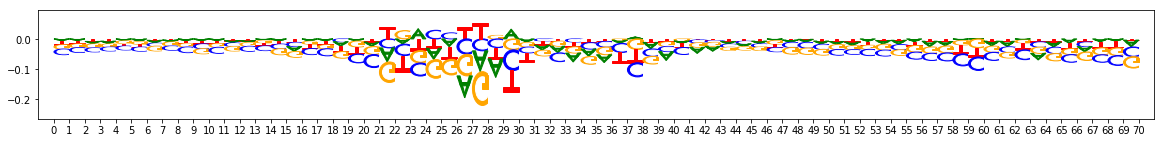

Task 0 actual importance scores:


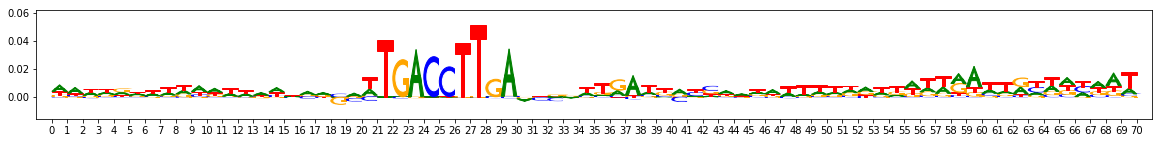

onehot, fwd and rev:


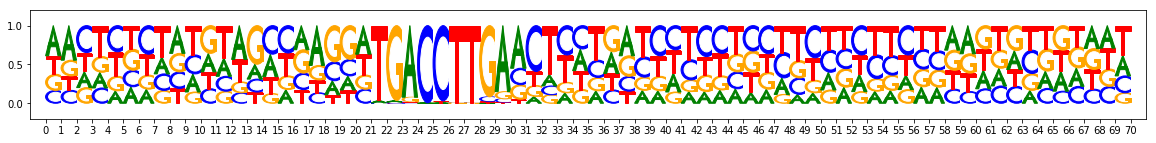

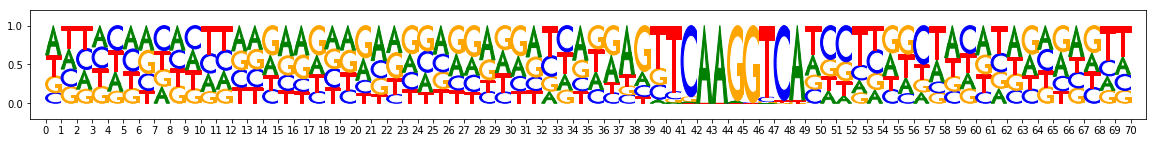

metacluster_0 pattern_10
total seqlets: 140
Task 0 hypothetical scores:


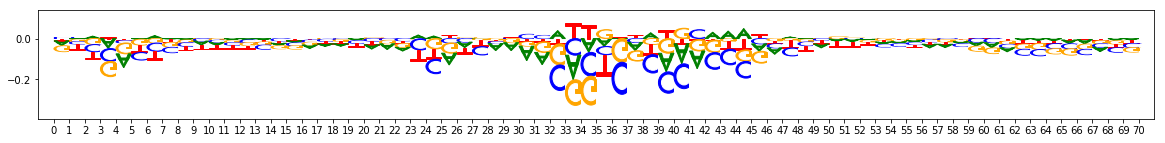

Task 0 actual importance scores:


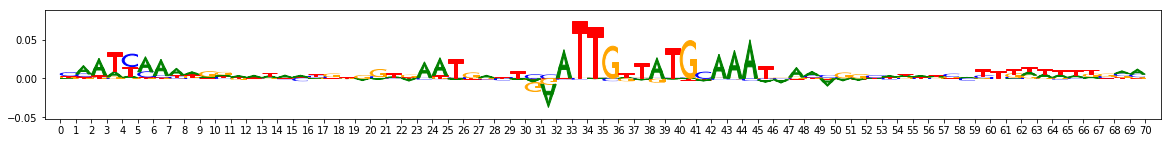

onehot, fwd and rev:


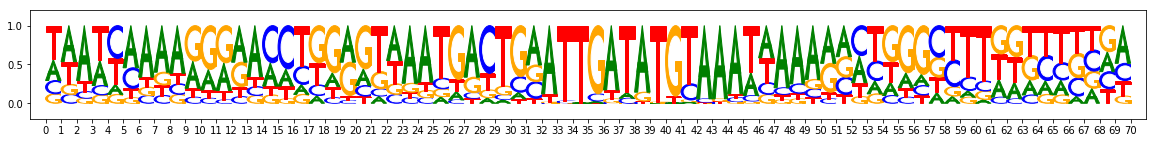

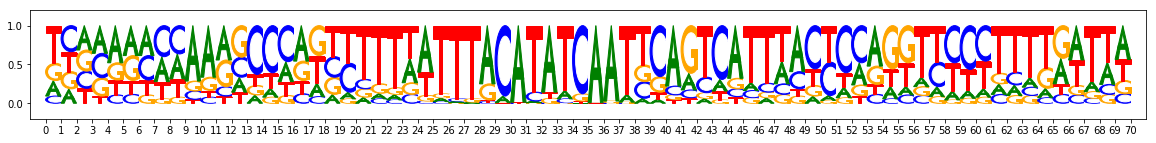

metacluster_0 pattern_11
total seqlets: 103
Task 0 hypothetical scores:


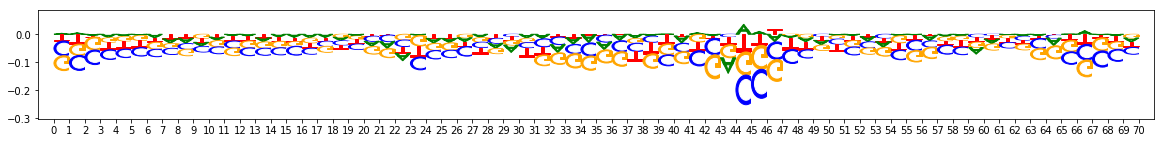

Task 0 actual importance scores:


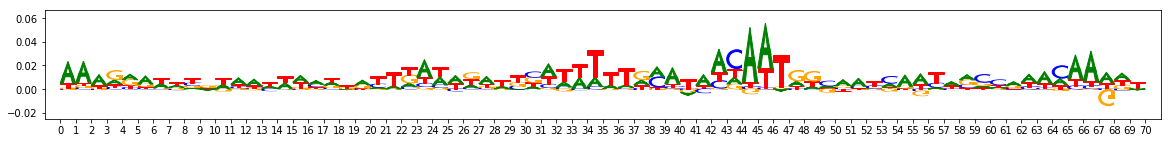

onehot, fwd and rev:


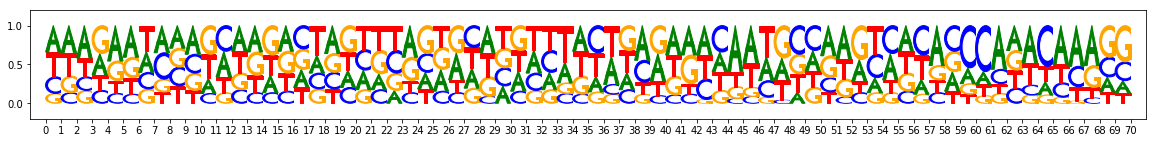

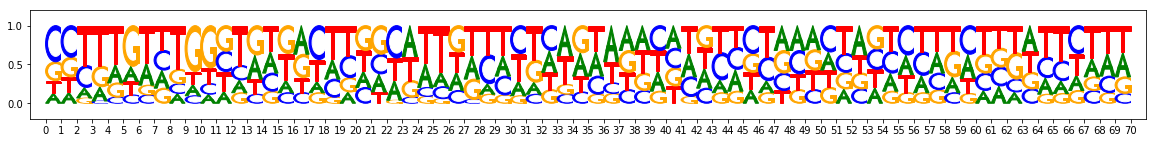

metacluster_0 pattern_12
total seqlets: 94
Task 0 hypothetical scores:


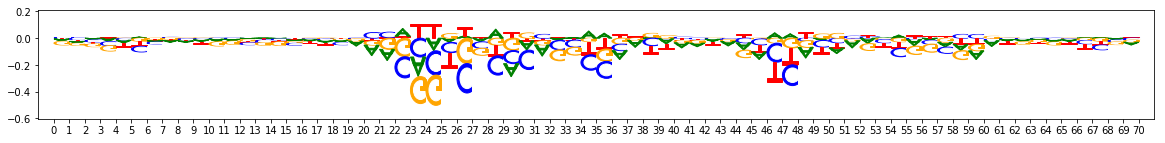

Task 0 actual importance scores:


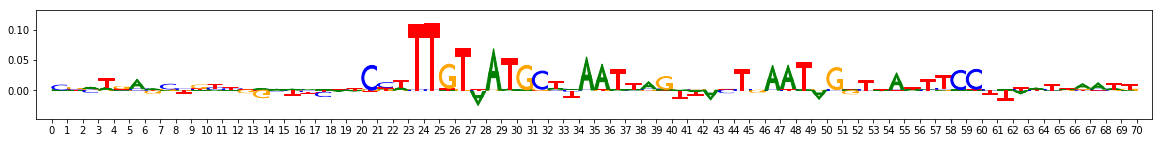

onehot, fwd and rev:


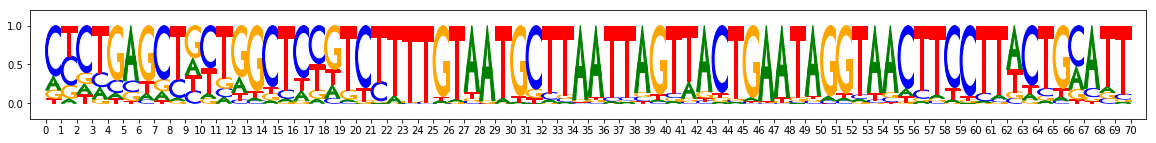

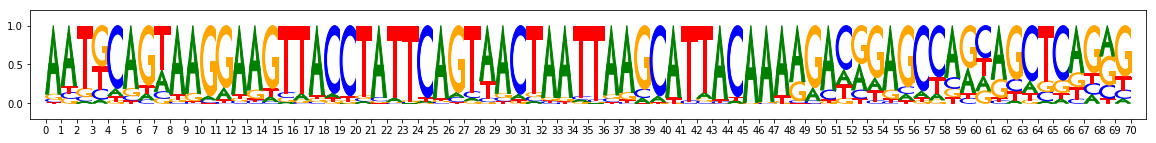

metacluster_0 pattern_13
total seqlets: 86
Task 0 hypothetical scores:


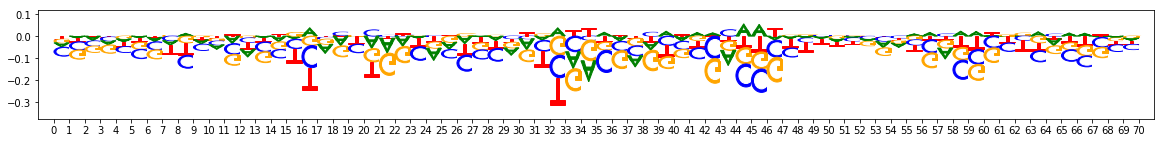

Task 0 actual importance scores:


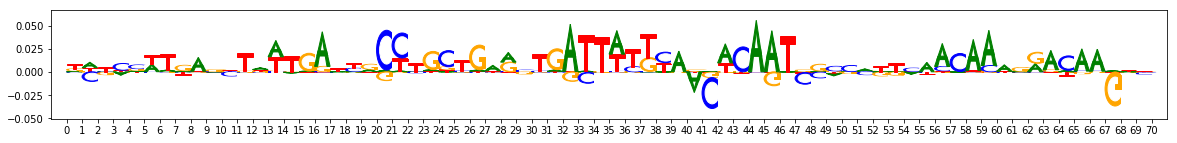

onehot, fwd and rev:


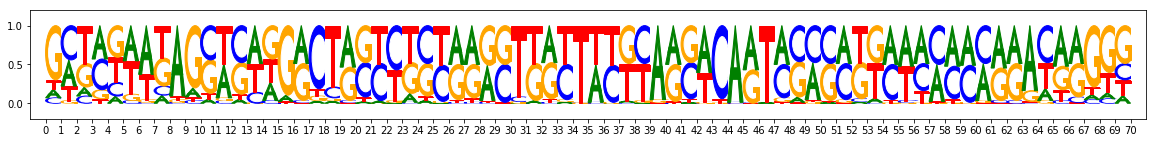

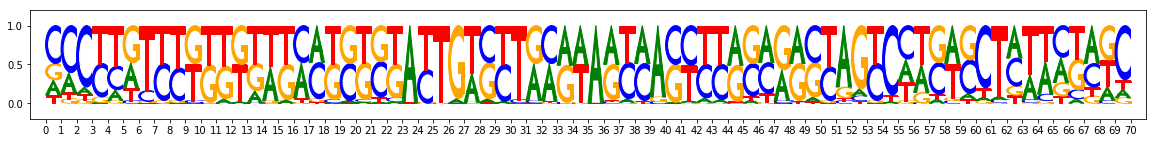

metacluster_0 pattern_14
total seqlets: 85
Task 0 hypothetical scores:


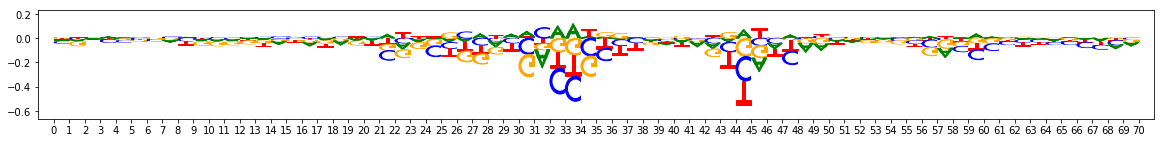

Task 0 actual importance scores:


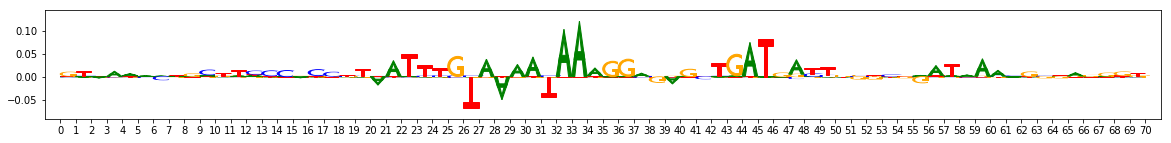

onehot, fwd and rev:


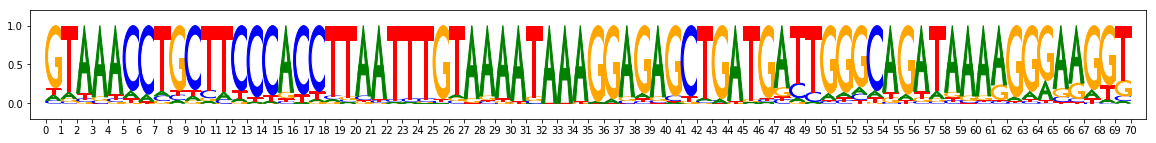

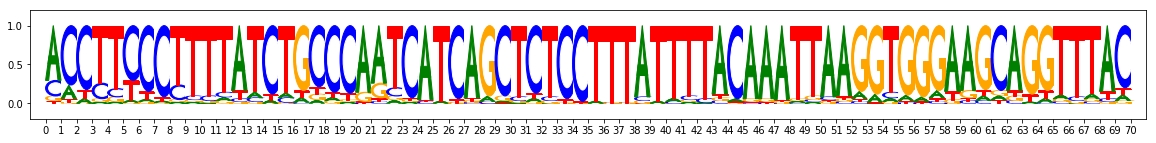

metacluster_0 pattern_15
total seqlets: 82
Task 0 hypothetical scores:


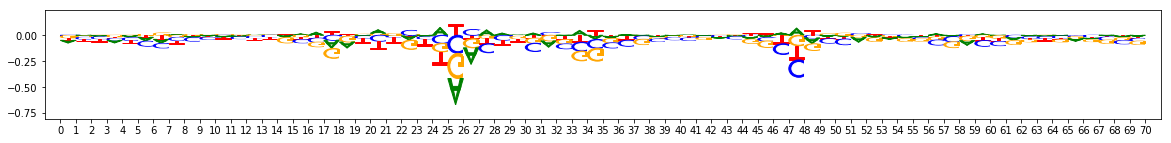

Task 0 actual importance scores:


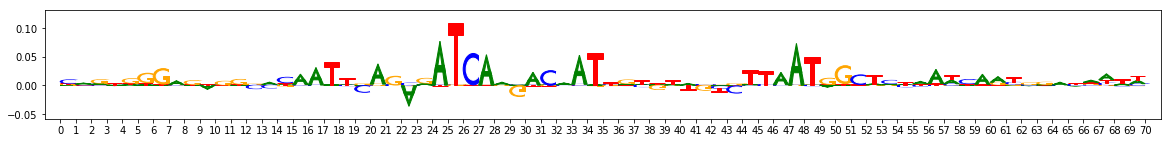

onehot, fwd and rev:


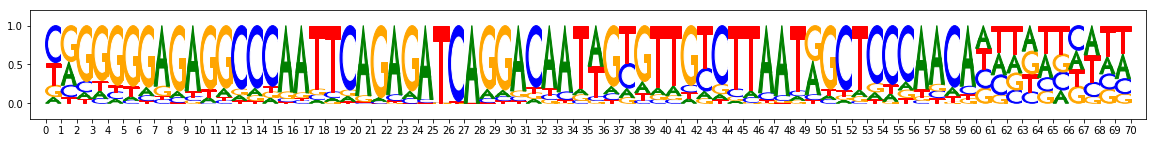

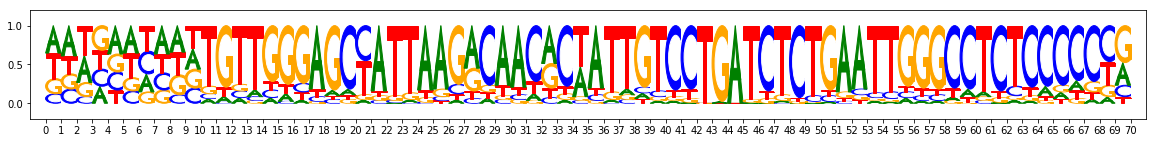

metacluster_0 pattern_16
total seqlets: 85
Task 0 hypothetical scores:


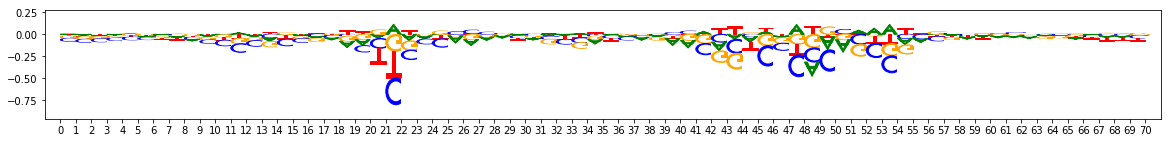

Task 0 actual importance scores:


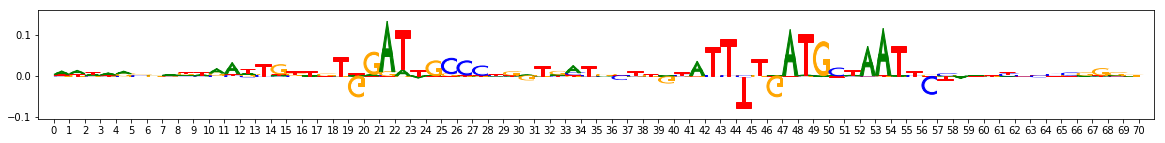

onehot, fwd and rev:


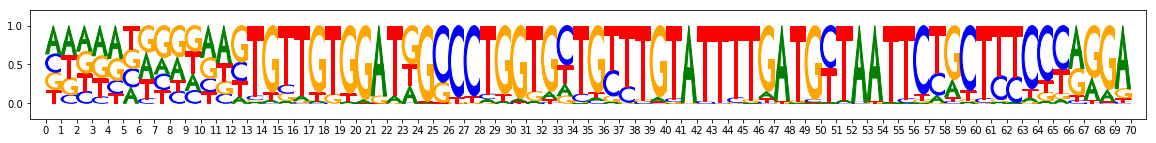

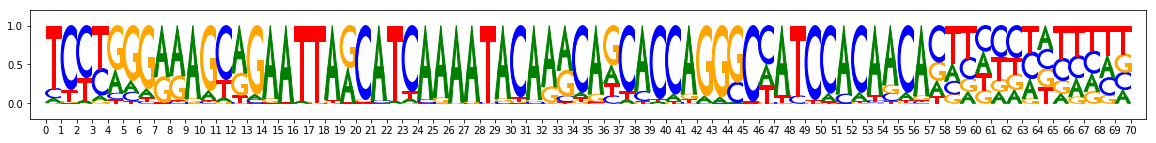

In [3]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File("nonsparserun_l6g2m0_results.hdf5","r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()